In [1]:
import os
import sys

# Ensure project root is on path
_root = os.path.abspath(os.getcwd())
if os.path.basename(_root) == "notebooks":
    _root = os.path.dirname(_root)
if _root not in sys.path:
    sys.path.insert(0, _root)

import numpy as np
import matplotlib.pyplot as plt
from rfi.scenario import (
    run_multi_entry_rfi_scenario,
    run_dynamic_geometry_rfi_scenario,
    VICTIM_BANDS,
    INTERFERENCE_SCENARIOS,
)

## Static Scenario Comparison

In [2]:
static_result = run_multi_entry_rfi_scenario(
    band_params=VICTIM_BANDS["Ka-band"],
    interferer_list=INTERFERENCE_SCENARIOS["Strong"],
    time_sim_samples=5000,
)

print("Ka-band static scenario:")
print(f"  SNR Loss (dB): {static_result['SNR Loss (dB)']:.2f}")
print(f"  P(SNR Loss > 1 dB) (%): {static_result['P(SNR Loss > 1 dB) (%)']:.2f}")
print(f"  P(SNR Loss > 3 dB) (%): {static_result['P(SNR Loss > 3 dB) (%)']:.2f}")
print(f"  P(SNR Loss > 6 dB) (%): {static_result['P(SNR Loss > 6 dB) (%)']:.2f}")

Ka-band static scenario:
  SNR Loss (dB): 0.02
  P(SNR Loss > 1 dB) (%): 0.24
  P(SNR Loss > 3 dB) (%): 0.00
  P(SNR Loss > 6 dB) (%): 0.00


## Dynamic Geometry Scenario

In [3]:
leo_altitude_km = 1200
duration_sec = 7200  # 2 hours
dt_sec = 10
interferer_eirp_dbw = 30

dynamic_result = run_dynamic_geometry_rfi_scenario(
    band_params=VICTIM_BANDS["Ka-band"],
    leo_altitude_km=leo_altitude_km,
    duration_sec=duration_sec,
    dt_sec=dt_sec,
    interferer_eirp_dbw=interferer_eirp_dbw,
)

## EPFD Time Series and Compliance

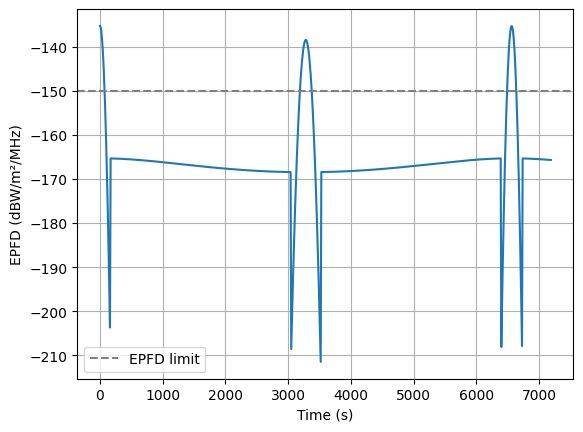

In [4]:
t = dynamic_result["Time (s)"]
epfd_db = dynamic_result["EPFD_time_series (dBW/m2/MHz)"]
epfd_limit_db = dynamic_result["EPFD_limit (dBW/m2/MHz)"]

plt.figure()
plt.plot(t, epfd_db)
plt.axhline(y=epfd_limit_db, color="gray", linestyle="--", label="EPFD limit")
plt.xlabel("Time (s)")
plt.ylabel("EPFD (dBW/m²/MHz)")
plt.grid(True)
plt.legend()
plt.show()

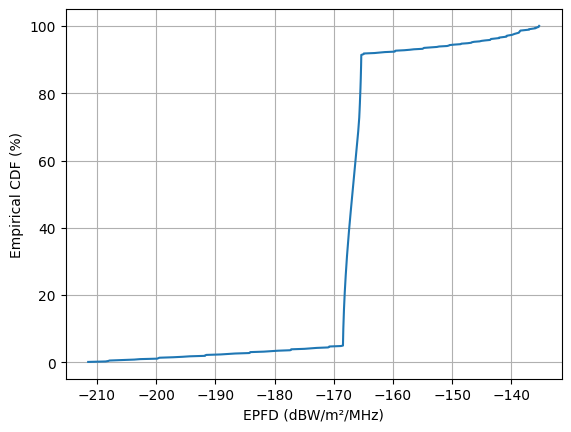

In [5]:
epfd_sorted = np.sort(dynamic_result["EPFD_time_series (dBW/m2/MHz)"])
n = len(epfd_sorted)
cdf = (np.arange(1, n + 1) / n) * 100

plt.figure()
plt.plot(epfd_sorted, cdf)
plt.xlabel("EPFD (dBW/m²/MHz)")
plt.ylabel("Empirical CDF (%)")
plt.grid(True)
plt.show()

In [6]:
print(f"EPFD_exceedance (%): {dynamic_result['EPFD_exceedance (%)']:.2f}")
print(f"EPFD_compliance_status: {dynamic_result['EPFD_compliance_status']}")

EPFD_exceedance (%): 5.69
EPFD_compliance_status: Non-Compliant


## Modulation and Link Availability

Modulation distribution (%):
{'QPSK': np.float64(100.0), '8PSK': np.float64(0.0), '16APSK': np.float64(0.0), '32APSK': np.float64(0.0), 'Outage': np.float64(0.0)}


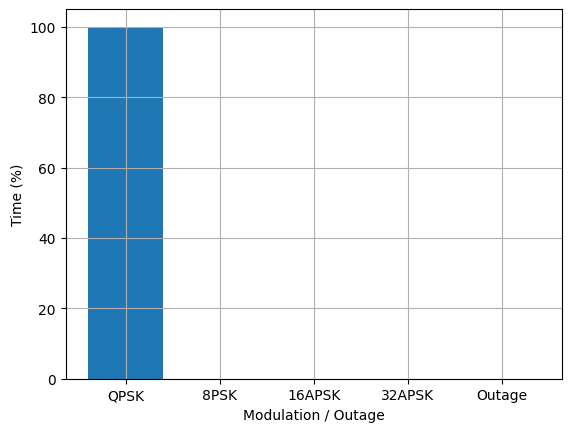

In [ ]:
modulation_distribution = dynamic_result["Modulation_distribution (%)"]
print("Modulation distribution (%):")
print(modulation_distribution)

names = list(modulation_distribution.keys())
pcts = list(modulation_distribution.values())
plt.figure()
plt.bar(names, pcts)
plt.xlabel("Modulation / Outage")
plt.ylabel("Time (%)")
plt.grid(True)
plt.show()

In [8]:
print(f"Link_availability (%): {dynamic_result['Link_availability (%)']:.2f}")

Link_availability (%): 100.00


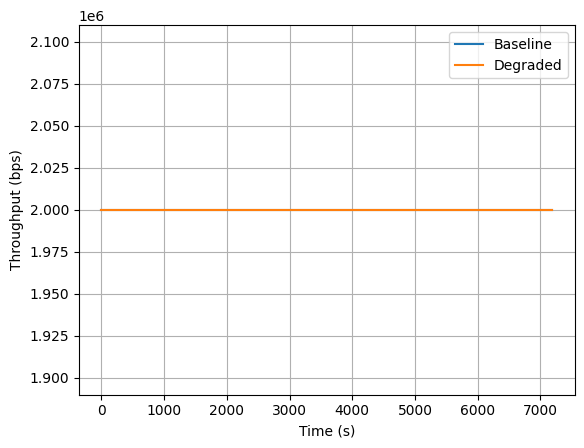

In [ ]:
# Throughput time series (dynamic scenario)
t = dynamic_result["Time (s)"]
thr_degraded = dynamic_result["Throughput_degraded (bps)"]
thr_baseline = dynamic_result["Throughput_baseline (bps)"]

plt.figure()
plt.plot(t, thr_baseline, label="Baseline")
plt.plot(t, thr_degraded, label="Degraded")
plt.xlabel("Time (s)")
plt.ylabel("Throughput (bps)")
plt.legend()
plt.grid(True)
plt.show()

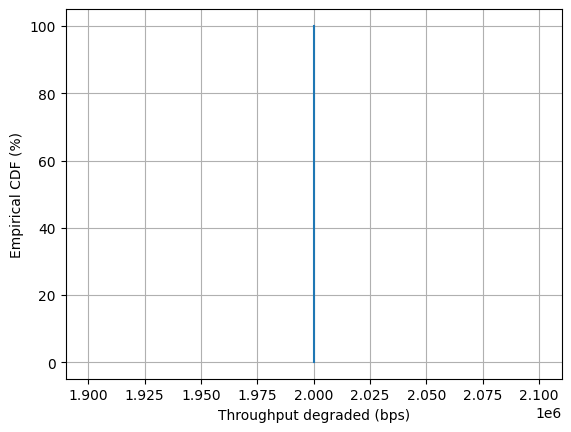

In [10]:
# Throughput CDF (degraded)
thr_sorted = np.sort(dynamic_result["Throughput_degraded (bps)"])
n = len(thr_sorted)
cdf = (np.arange(1, n + 1) / n) * 100

plt.figure()
plt.plot(thr_sorted, cdf)
plt.xlabel("Throughput degraded (bps)")
plt.ylabel("Empirical CDF (%)")
plt.grid(True)
plt.show()

## Plots: Geometry and Interference Time Series

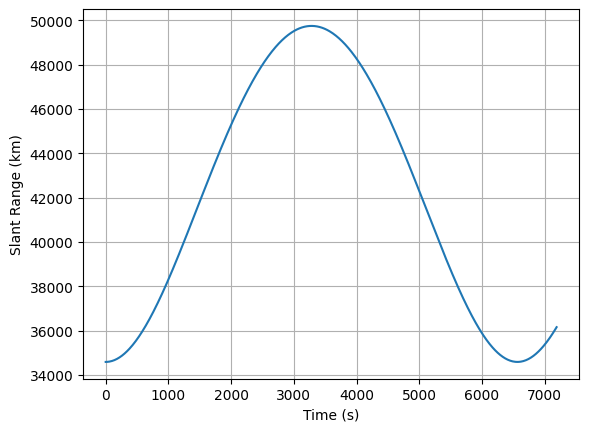

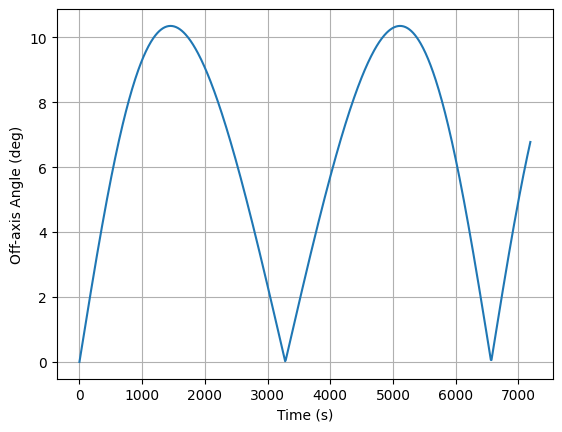

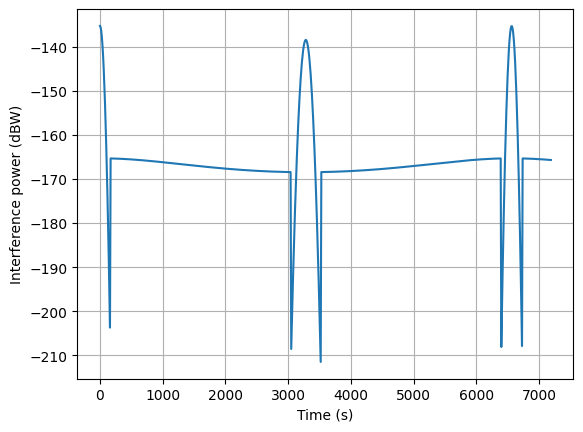

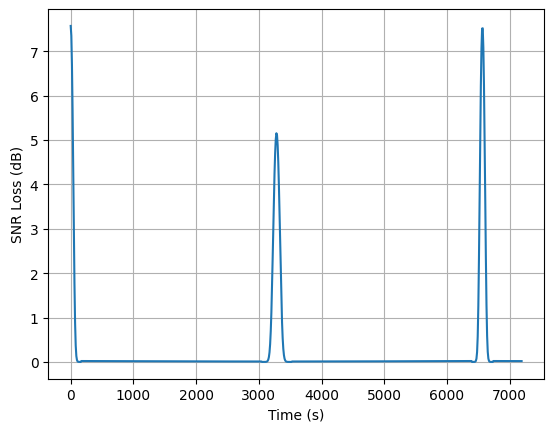

In [11]:
t = dynamic_result["Time (s)"]
d_km = dynamic_result["Slant Range (km)"]
theta_deg = dynamic_result["Off-axis Angle (deg)"]
I_dbw = dynamic_result["I_time_series (dBW)"]
snr_loss_db = dynamic_result["SNR_loss_time_series (dB)"]

plt.figure()
plt.plot(t, d_km)
plt.xlabel("Time (s)")
plt.ylabel("Slant Range (km)")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, theta_deg)
plt.xlabel("Time (s)")
plt.ylabel("Off-axis Angle (deg)")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, I_dbw)
plt.xlabel("Time (s)")
plt.ylabel("Interference power (dBW)")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, snr_loss_db)
plt.xlabel("Time (s)")
plt.ylabel("SNR Loss (dB)")
plt.grid(True)
plt.show()

## CDF of SNR Loss

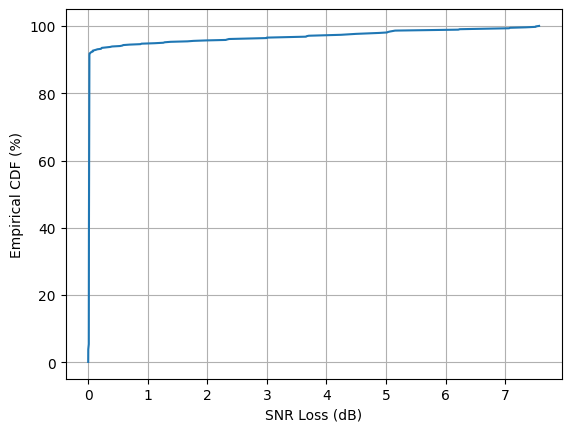

In [12]:
snr_loss_sorted = np.sort(dynamic_result["SNR_loss_time_series (dB)"])
n = len(snr_loss_sorted)
cdf = (np.arange(1, n + 1) / n) * 100

plt.figure()
plt.plot(snr_loss_sorted, cdf)
plt.xlabel("SNR Loss (dB)")
plt.ylabel("Empirical CDF (%)")
plt.grid(True)
plt.show()

## Phase 4 – Rain + RFI Joint Impact

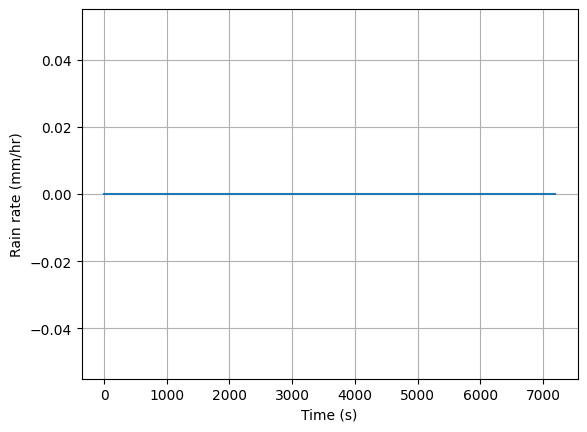

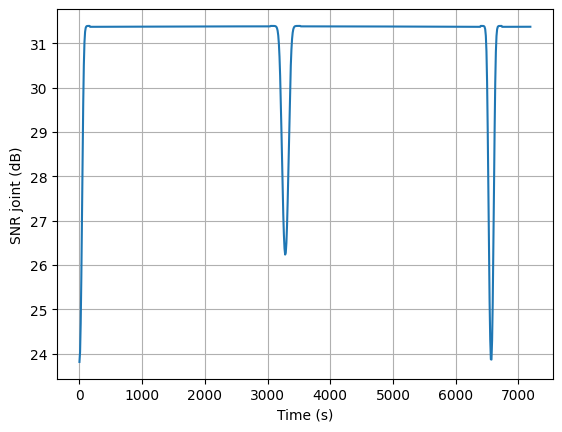

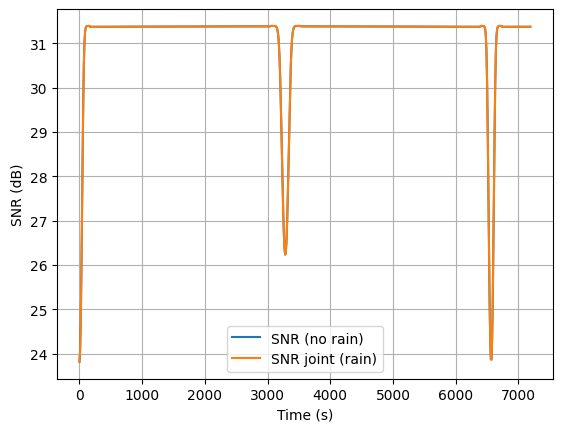

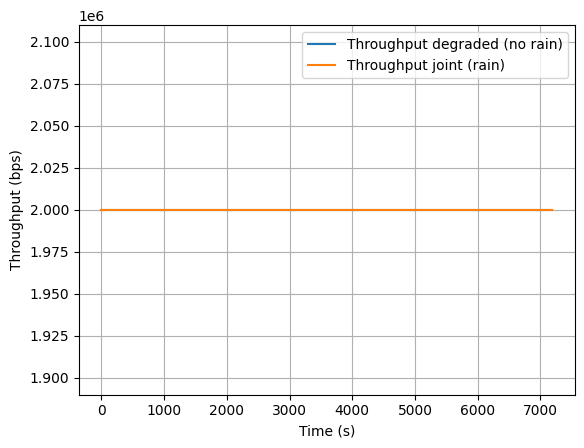

Joint_outage (%): 0.00
Throughput_degradation (%) under rain: 0.00


In [13]:
from rfi.link_adaptation import (
    map_snr_to_spectral_efficiency,
    compute_throughput_bps,
    compute_throughput_degradation_percent,
)

leo_altitude_km = 1200
duration_sec = 7200
dt_sec = 10
interferer_eirp_dbw = 30
rain_rate_mm_per_hr = 25
rain_probability = 0.3

rain_result = run_dynamic_geometry_rfi_scenario(
    band_params=VICTIM_BANDS["Ka-band"],
    leo_altitude_km=leo_altitude_km,
    duration_sec=duration_sec,
    dt_sec=dt_sec,
    interferer_eirp_dbw=interferer_eirp_dbw,
    rain_rate_mm_per_hr=rain_rate_mm_per_hr,
    rain_probability=rain_probability,
)

t = rain_result["Time (s)"]

plt.figure()
plt.plot(t, rain_result["Rain_rate_time_series (mm/hr)"])
plt.xlabel("Time (s)")
plt.ylabel("Rain rate (mm/hr)")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, rain_result["SNR_joint_time_series (dB)"])
plt.xlabel("Time (s)")
plt.ylabel("SNR joint (dB)")
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, rain_result["SNR_time_series (dB)"], label="SNR (no rain)")
plt.plot(t, rain_result["SNR_joint_time_series (dB)"], label="SNR joint (rain)")
plt.xlabel("Time (s)")
plt.ylabel("SNR (dB)")
plt.legend()
plt.grid(True)
plt.show()

bw_hz = VICTIM_BANDS["Ka-band"].get("BW_Hz", 1e6)
spectral_eff_joint = map_snr_to_spectral_efficiency(rain_result["SNR_joint_time_series (dB)"])
throughput_joint_bps = compute_throughput_bps(spectral_eff_joint, bw_hz)

plt.figure()
plt.plot(t, rain_result["Throughput_degraded (bps)"], label="Throughput degraded (no rain)")
plt.plot(t, throughput_joint_bps, label="Throughput joint (rain)")
plt.xlabel("Time (s)")
plt.ylabel("Throughput (bps)")
plt.legend()
plt.grid(True)
plt.show()

throughput_degradation_rain = compute_throughput_degradation_percent(
    rain_result["Throughput_baseline (bps)"],
    throughput_joint_bps,
)
print(f"Joint_outage (%): {rain_result['Joint_outage (%)']:.2f}")
print(f"Throughput_degradation (%) under rain: {throughput_degradation_rain:.2f}")

## Phase 5 – Cross-Band Robustness Analysis

In [14]:
from rfi.robustness import (
    compute_rfi_robustness_index,
    rank_bands_by_robustness,
)

bands = list(VICTIM_BANDS.keys())

band_rri = {}

for band in bands:
    result = run_dynamic_geometry_rfi_scenario(
        band_params=VICTIM_BANDS[band],
        leo_altitude_km=1200,
        duration_sec=3600,
        dt_sec=10,
        interferer_eirp_dbw=30,
        rain_rate_mm_per_hr=25,
        rain_probability=0.3,
    )

    rri = compute_rfi_robustness_index(
        throughput_degradation_percent=result["Throughput_degradation (%)"],
        link_availability_percent=result["Link_availability (%)"],
        epfd_exceed_percent=result["EPFD_exceedance (%)"],
        joint_outage_percent=result["Joint_outage (%)"],
    )

    band_rri[band] = rri

ranking = rank_bands_by_robustness(band_rri)

print("Band Robustness Ranking (Highest to Lowest):")
for band, value in ranking:
    print(f"{band}: {value:.3f}")

Band Robustness Ranking (Highest to Lowest):
Ka-band: 0.981
K-band: 0.976
Ku-band: 0.971
X-band: 0.955
S-band: 0.858


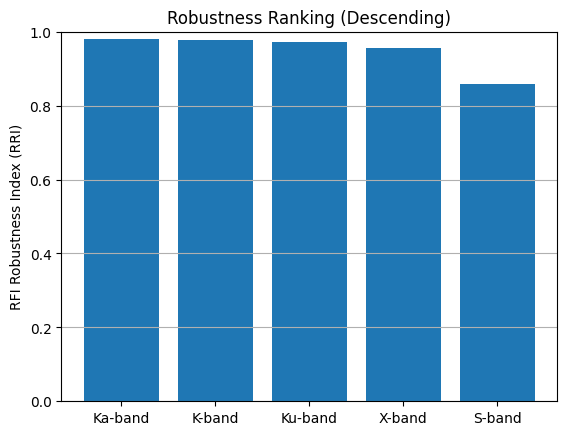

In [ ]:
import matplotlib.pyplot as plt

# Sorted ranking (descending)
sorted_bands = [b for b, _ in ranking]
sorted_values = [v for _, v in ranking]

plt.figure()
plt.bar(sorted_bands, sorted_values)
plt.ylabel("RFI Robustness Index (RRI)")
plt.title("Robustness Ranking (Descending)")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()

## Phase 6 – 6G X-Band What-If Scenario

In [ ]:
# Define 6G terrestrial interferer parameters (hypothetical scenario)

sixg_interferer_params = {
    "leo_altitude_km": 1200,
    "duration_sec": 3600,
    "dt_sec": 10,
    "interferer_eirp_dbw": 40,   # Higher EIRP to simulate dense 6G deployment
    "rain_rate_mm_per_hr": 25,
    "rain_probability": 0.3,
}

print("6G What-If Scenario Parameters:")
for k, v in sixg_interferer_params.items():
    print(f"{k}: {v}")

6G What-If Scenario Parameters:
leo_altitude_km: 1200
duration_sec: 3600
dt_sec: 10
interferer_eirp_dbw: 40
rain_rate_mm_per_hr: 25
rain_probability: 0.3


In [17]:
# Baseline X-band (current interference level)

baseline_x_result = run_dynamic_geometry_rfi_scenario(
    band_params=VICTIM_BANDS["X-band"],
    leo_altitude_km=1200,
    duration_sec=3600,
    dt_sec=10,
    interferer_eirp_dbw=30,  # Existing baseline interferer
    rain_rate_mm_per_hr=25,
    rain_probability=0.3,
)

print("Baseline X-band Metrics:")
print("Throughput degradation (%):", baseline_x_result["Throughput_degradation (%)"])
print("EPFD exceedance (%):", baseline_x_result["EPFD_exceedance (%)"])
print("Link availability (%):", baseline_x_result["Link_availability (%)"])
print("Joint outage (%):", baseline_x_result["Joint_outage (%)"])

Baseline X-band Metrics:
Throughput degradation (%): 1.1111111111111112
EPFD exceedance (%): 14.722222222222223
Link availability (%): 98.88888888888889
Joint outage (%): 1.1111111111111112


In [18]:
# 6G boosted interference case (higher EIRP)

sixg_x_result = run_dynamic_geometry_rfi_scenario(
    band_params=VICTIM_BANDS["X-band"],
    leo_altitude_km=sixg_interferer_params["leo_altitude_km"],
    duration_sec=sixg_interferer_params["duration_sec"],
    dt_sec=sixg_interferer_params["dt_sec"],
    interferer_eirp_dbw=sixg_interferer_params["interferer_eirp_dbw"],
    rain_rate_mm_per_hr=sixg_interferer_params["rain_rate_mm_per_hr"],
    rain_probability=sixg_interferer_params["rain_probability"],
)

print("6G X-band Metrics:")
print("Throughput degradation (%):", sixg_x_result["Throughput_degradation (%)"])
print("EPFD exceedance (%):", sixg_x_result["EPFD_exceedance (%)"])
print("Link availability (%):", sixg_x_result["Link_availability (%)"])
print("Joint outage (%):", sixg_x_result["Joint_outage (%)"])

6G X-band Metrics:
Throughput degradation (%): 11.38888888888889
EPFD exceedance (%): 19.166666666666668
Link availability (%): 88.61111111111111
Joint outage (%): 11.38888888888889


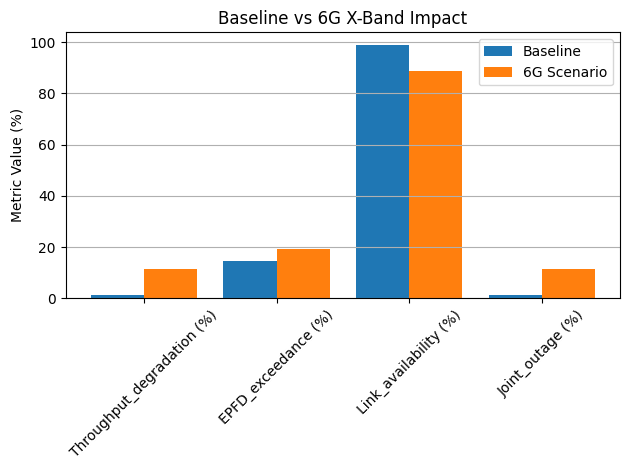

In [ ]:
import matplotlib.pyplot as plt

metrics = [
    "Throughput_degradation (%)",
    "EPFD_exceedance (%)",
    "Link_availability (%)",
    "Joint_outage (%)",
]

baseline_values = [baseline_x_result[m] for m in metrics]
sixg_values = [sixg_x_result[m] for m in metrics]

x = range(len(metrics))

plt.figure()
plt.bar(x, baseline_values, width=0.4, label="Baseline", align="center")
plt.bar([i + 0.4 for i in x], sixg_values, width=0.4, label="6G Scenario", align="center")

plt.xticks([i + 0.2 for i in x], metrics, rotation=45)
plt.ylabel("Metric Value (%)")
plt.title("Baseline vs 6G X-Band Impact")
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [20]:
from rfi.robustness import compute_rfi_robustness_index

baseline_rri = compute_rfi_robustness_index(
    throughput_degradation_percent=baseline_x_result["Throughput_degradation (%)"],
    link_availability_percent=baseline_x_result["Link_availability (%)"],
    epfd_exceed_percent=baseline_x_result["EPFD_exceedance (%)"],
    joint_outage_percent=baseline_x_result["Joint_outage (%)"],
)

sixg_rri = compute_rfi_robustness_index(
    throughput_degradation_percent=sixg_x_result["Throughput_degradation (%)"],
    link_availability_percent=sixg_x_result["Link_availability (%)"],
    epfd_exceed_percent=sixg_x_result["EPFD_exceedance (%)"],
    joint_outage_percent=sixg_x_result["Joint_outage (%)"],
)

print("Baseline X-band RRI:", round(baseline_rri, 3))
print("6G X-band RRI:", round(sixg_rri, 3))
print("RRI Difference:", round(baseline_rri - sixg_rri, 3))

Baseline X-band RRI: 0.955
6G X-band RRI: 0.867
RRI Difference: 0.088


## Phase 7 – Sensitivity Analysis (EIRP Sweep)

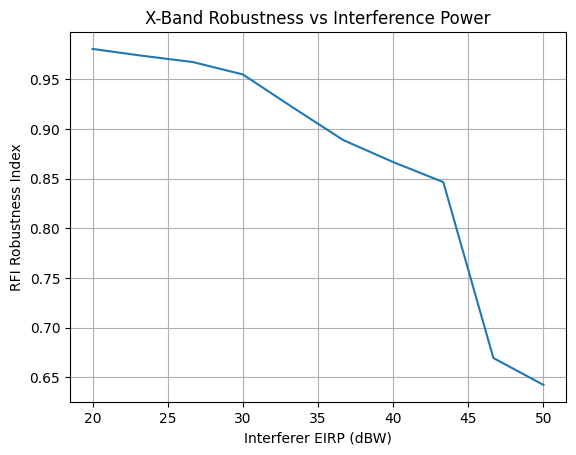

In [21]:
eirp_values = np.linspace(20, 50, 10)

rri_values = []

for eirp in eirp_values:
    result = run_dynamic_geometry_rfi_scenario(
        band_params=VICTIM_BANDS["X-band"],
        leo_altitude_km=1200,
        duration_sec=3600,
        dt_sec=10,
        interferer_eirp_dbw=eirp,
        rain_rate_mm_per_hr=25,
        rain_probability=0.3,
    )

    rri = compute_rfi_robustness_index(
        throughput_degradation_percent=result["Throughput_degradation (%)"],
        link_availability_percent=result["Link_availability (%)"],
        epfd_exceed_percent=result["EPFD_exceedance (%)"],
        joint_outage_percent=result["Joint_outage (%)"],
    )

    rri_values.append(rri)

plt.figure()
plt.plot(eirp_values, rri_values)
plt.xlabel("Interferer EIRP (dBW)")
plt.ylabel("RFI Robustness Index")
plt.title("X-Band Robustness vs Interference Power")
plt.grid()
plt.show()

## Rain CDF Comparison (No Rain vs Rain + RFI)

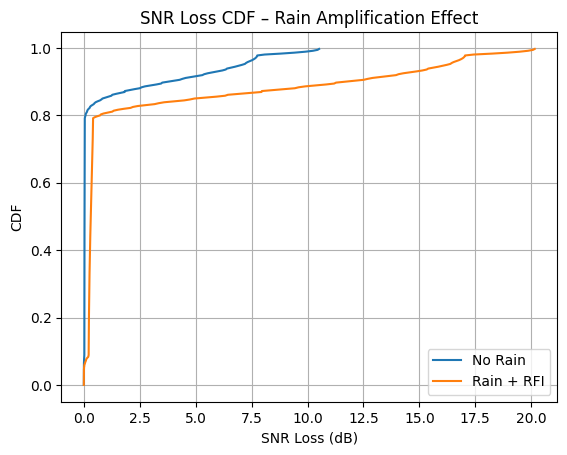

In [22]:
# X-band, same interferer EIRP (30 dBW): two cases for rain impact only
# Case A: no rain
result_no_rain = run_dynamic_geometry_rfi_scenario(
    band_params=VICTIM_BANDS["X-band"],
    leo_altitude_km=1200,
    duration_sec=3600,
    dt_sec=10,
    interferer_eirp_dbw=30,
    rain_rate_mm_per_hr=0,
    rain_probability=0,
)
# Case B: rain
result_with_rain = run_dynamic_geometry_rfi_scenario(
    band_params=VICTIM_BANDS["X-band"],
    leo_altitude_km=1200,
    duration_sec=3600,
    dt_sec=10,
    interferer_eirp_dbw=30,
    rain_rate_mm_per_hr=25,
    rain_probability=0.3,
)

# Extract SNR joint loss for both (same interference power; only rain differs)
snr_joint_no_rain = result_no_rain["SNR_joint_loss_time_series (dB)"]
snr_joint_with_rain = result_with_rain["SNR_joint_loss_time_series (dB)"]

# Plot CDF comparison
for data, label in [
    (snr_joint_no_rain, "No Rain (30 dBW)"),
    (snr_joint_with_rain, "Rain + RFI (30 dBW)"),
]:
    sorted_data = np.sort(data)
    cdf = np.arange(len(sorted_data)) / len(sorted_data)
    plt.plot(sorted_data, cdf, label=label)

plt.xlabel("SNR Loss (dB)")
plt.ylabel("CDF")
plt.title("Rain Impact on X-Band (Same Interference Power)")
plt.legend()
plt.grid()
plt.show()

## EPFD Limit Sensitivity Analysis

In [ ]:
from rfi.compliance import compute_epfd_exceedance_probability

# Use baseline X-band result (30 dBW case)
epfd_series = baseline_x_result["EPFD_time_series (dBW/m2/MHz)"]

epfd_limits = [-155, -150, -145]

print("EPFD Limit Sensitivity (X-band, 30 dBW):")
for limit in epfd_limits:
    exceed_percent = compute_epfd_exceedance_probability(
        epfd_series,
        limit,
    )
    print(f"Limit {limit} dBW/m2/MHz -> Exceedance: {exceed_percent:.2f}%")

## Summary Table (All Bands)

In [23]:
import pandas as pd

summary_data = []

for band in VICTIM_BANDS.keys():
    result = run_dynamic_geometry_rfi_scenario(
        band_params=VICTIM_BANDS[band],
        leo_altitude_km=1200,
        duration_sec=3600,
        dt_sec=10,
        interferer_eirp_dbw=30,
        rain_rate_mm_per_hr=25,
        rain_probability=0.3,
    )

    rri = compute_rfi_robustness_index(
        throughput_degradation_percent=result["Throughput_degradation (%)"],
        link_availability_percent=result["Link_availability (%)"],
        epfd_exceed_percent=result["EPFD_exceedance (%)"],
        joint_outage_percent=result["Joint_outage (%)"],
    )

    summary_data.append({
        "Band": band,
        "Throughput Degradation (%)": result["Throughput_degradation (%)"],
        "Availability (%)": result["Link_availability (%)"],
        "EPFD Exceedance (%)": result["EPFD_exceedance (%)"],
        "RRI": rri,
    })

df_summary = pd.DataFrame(summary_data)
df_summary.sort_values("RRI", ascending=False)

,Band,Throughput Degradation (%),Availability (%),EPFD Exceedance (%),RRI
4,Ka-band,0.000000,100.000000,7.500000,0.981250
3,K-band,0.000000,100.000000,9.444444,0.976389
2,Ku-band,0.000000,100.000000,11.666667,0.970833
1,X-band,1.111111,98.888889,14.722222,0.954861
0,S-band,10.277778,89.722222,25.833333,0.858333
